In [24]:
import pandas as pd
df=pd.read_csv("kmeans_dataset.csv")
df.head()

,Feature1,Feature2,Cluster
0,-8.498382,7.012837,3
1,-5.989113,-6.520958,2
2,-6.209635,-6.788903,2
3,4.088646,0.953356,1
4,4.328369,0.169398,1


In [25]:
df["Cluster"].value_counts()

Cluster
3    250
2    250
1    250
0    250
Name: count, dtype: int64

In [26]:
x=df.iloc[:, [0, 1]].values
y=df["Cluster"].values

In [27]:
x

array([[-8.49838231,  7.01283695],
       [-5.98911274, -6.5209585 ],
       [-6.2096349 , -6.78890312],
       ...,
       [ 3.50060017,  5.13202816],
       [-7.61104183, -7.10447516],
       [-9.51292939,  7.07245667]], shape=(1000, 2))

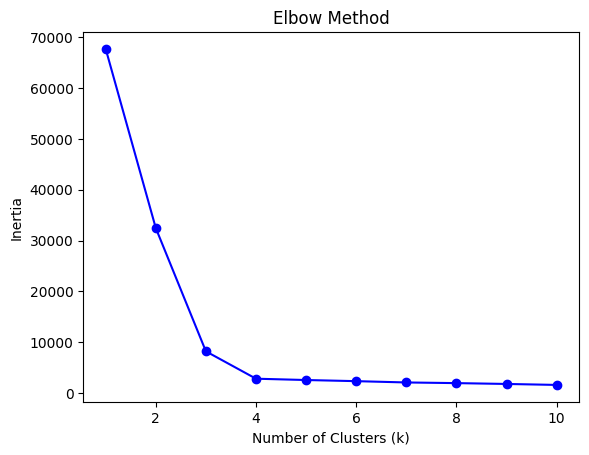

In [28]:
import matplotlib.pyplot as plt
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x)
    inertia.append(kmeans.inertia_)

plt.plot(K, inertia, 'bo-')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()
from sklearn.cluster import KMeans

In [29]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
df['Cluster'] = kmeans.fit_predict(x)

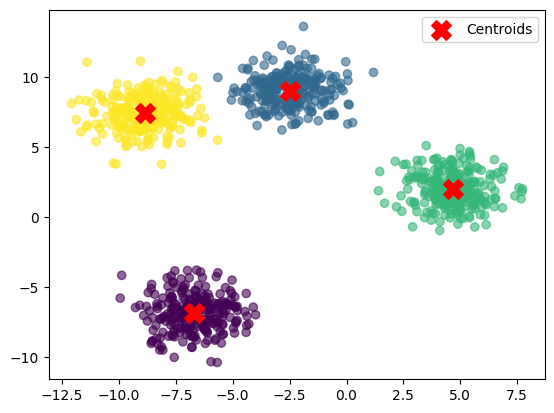

In [30]:
plt.scatter(df["Feature1"], df["Feature2"], c=df["Cluster"], cmap="viridis", alpha=0.6)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c="red", marker="X", s=200, label="Centroids")
plt.legend()
plt.show()


In [31]:
from sklearn.metrics import silhouette_score
print(f"Silhouette Score: {silhouette_score(x, kmeans.labels_)}")

Silhouette Score: 0.7501155415904456
